## Get the text

In [1]:
text=["Computer programming is the process of designing and building an executable computer program to accomplish a specific computing result or to perform a specific task.",
      "Programming involves tasks such as: analysis, generating algorithms, profiling algorithms' accuracy and resource consumption, and the implementation of algorithms in a chosen programming language (commonly referred to as coding).",
      "The source program is written in one or more languages that are intelligible to programmers, rather than machine code, which is directly executed by the central processing unit.",
      "The purpose of programming is to find a sequence of instructions that will automate the performance of a task (which can be as complex as an operating system) on a computer, often for solving a given problem.",
      "Proficient programming thus often requires expertise in several different subjects, including knowledge of the application domain, specialized algorithms, and formal logic.",
      "Tasks accompanying and related to programming include: testing, debugging, source code maintenance, implementation of build systems, and management of derived artifacts, such as the machine code of computer programs.",
      "These might be considered part of the programming process, but often the term software development is used for this larger process with the term programming, implementation, or coding reserved for the actual writing of code.",
      "Software engineering combines engineering techniques with software development practices.",
    "Reverse engineering is a related process used by designers, analysts and programmers to understand and re-create/re-implement"]


## Import necessary modules

In [2]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD,NMF

## Use CountVectorizer/TF-IDF Vectorizer to obtain the input document-term matrix

In [3]:
vectorizer = TfidfVectorizer(stop_words='english',smooth_idf=True) #lowercasing,removing special chars,removing stop words
input_matrix = vectorizer.fit_transform(text)
input_matrix = vectorizer.fit_transform(text).todense()

## Function to get topics

In [27]:
topic_word_list = []
def get_topics(components):
  for i, comp in enumerate(components):
    terms_comp = zip(vocab,comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    topic=" "
    for t in sorted_terms:
      topic= topic + ' ' + t[0]
    topic_word_list.append(topic)
  return topic_word_list

## Use TruncatedSVD & choose randomized algo

In [21]:
svd_modeling= TruncatedSVD(n_components=4, algorithm='randomized', n_iter=100, random_state=122)
svd_modeling.fit(np.asarray(input_matrix))
components=svd_modeling.components_
vocab = vectorizer.get_feature_names_out()
get_topics(components) 

['  programming process code software engineering term computer',
 '  engineering software development combines practices techniques used',
 '  algorithms software application different domain expertise formal',
 '  task computer specific automate complex given instructions']

## Word Clouds for Topic Visualization

In [15]:
!pip install wordcloud

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

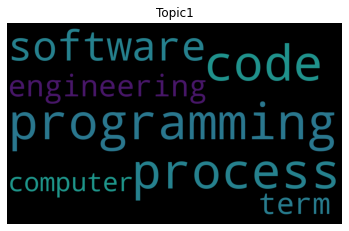

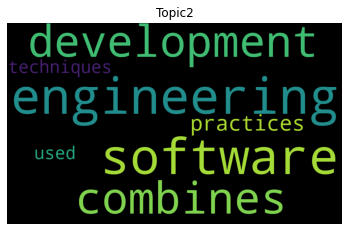

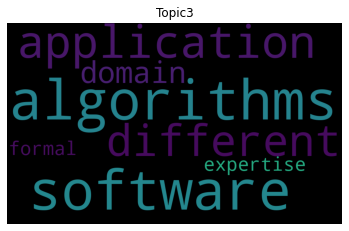

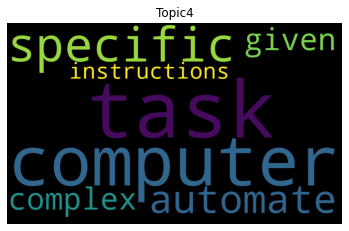

In [22]:
for i in range(4):
  wc = WordCloud(width=1000, height=600, margin=3,  prefer_horizontal=0.7,scale=1,background_color='black', relative_scaling=0).generate(topic_word_list[i])
  plt.imshow(wc)
  plt.title(f"Topic{i+1}")
  plt.axis("off")
  plt.show()

## Non-negative Matrix Factorization

In [ ]:
NMF_model = NMF(n_components=4, random_state=1)
W = NMF_model.fit_transform(np.asarray(input_matrix))
H = NMF_model.components_

topics=get_topics(H)

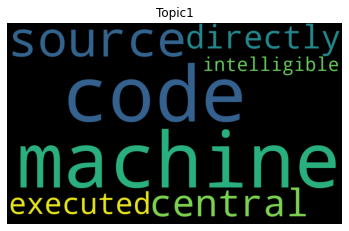

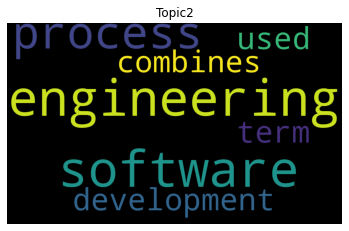

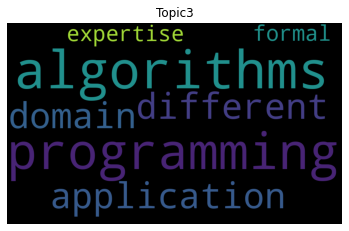

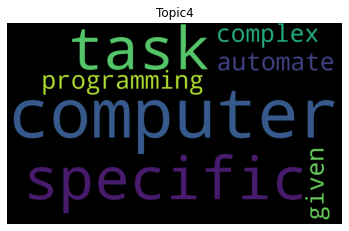

In [29]:
for i in range(4):
  wc = WordCloud(width=1000, height=600, margin=3,  prefer_horizontal=0.7,scale=1,background_color='black', relative_scaling=0).generate(topic_word_list[i])
  plt.imshow(wc)
  plt.title(f"Topic{i+1}")
  plt.axis("off")
  plt.show()